# **Import Libraries**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **Dataset Loading**

In [53]:
file_path1 = 'jakarta_air_pollution.csv'
file_path2 = 'jakarta_vehicle_emissions.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [54]:
df1

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2021,75,121.0,61,23,40,47,121,PM25,TIDAK SEHAT,DKI4
361,12/28/2021,59,89.0,53,16,34,33,89,PM25,SEDANG,DKI4
362,12/29/2021,61,98.0,54,15,37,29,98,PM25,SEDANG,DKI4
363,12/30/2021,60,102.0,53,17,38,44,102,PM25,TIDAK SEHAT,DKI4


In [55]:
df2

,periode_data,bahan_bakar,jumlah_lulus,jumlah_tidak_lulus,jumlah_uji_emisi
0,202101,Bensin,37525,487,38012
1,202101,Solar,5390,290,5680
2,202103,Bensin,28553,58,28611
3,202103,Solar,4340,16,4356
4,202105,Bensin,16060,16,16076
5,202105,Solar,1962,3,1965
6,202107,Bensin,6213,8,6221
7,202107,Solar,1061,1,1062
8,202104,Solar,3148,11,3159
9,202102,Bensin,27335,92,27427


# **Data Exploration**

In [56]:
print("Dataset 1 Information:")
print(df1.info())

Dataset 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB
None


In [57]:
print("\nDataset 2 Information:")
print(df2.info())


Dataset 2 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   periode_data        24 non-null     int64 
 1   bahan_bakar         24 non-null     object
 2   jumlah_lulus        24 non-null     int64 
 3   jumlah_tidak_lulus  24 non-null     int64 
 4   jumlah_uji_emisi    24 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB
None


In [58]:
print("\nStatistical Description of Dataset 1:")
print(df1.describe())


Statistical Description of Dataset 1:
             pm10        pm25         so2          co          o3         no2  \
count  365.000000  334.000000  365.000000  365.000000  365.000000  365.000000   
mean    60.506849   94.694611   52.753425   15.391781   49.805479   34.115068   
std     15.155896   24.153839   11.193823    5.857975   12.234790   15.974152   
min     19.000000   33.000000   37.000000    7.000000   20.000000    9.000000   
25%     53.000000   78.250000   45.000000   11.000000   41.000000   24.000000   
50%     62.000000   94.500000   52.000000   14.000000   49.000000   31.000000   
75%     68.000000  108.750000   55.000000   18.000000   57.000000   39.000000   
max    179.000000  174.000000  126.000000   47.000000  151.000000  134.000000   

              max  
count  365.000000  
mean    94.030137  
std     24.408647  
min     45.000000  
25%     77.000000  
50%     93.000000  
75%    108.000000  
max    179.000000  


In [59]:
print("\nStatistical Description of Dataset 2:")
print(df2.describe())


Statistical Description of Dataset 2:
        periode_data   jumlah_lulus  jumlah_tidak_lulus  jumlah_uji_emisi
count      24.000000      24.000000           24.000000         24.000000
mean   202106.500000   18178.500000          102.041667      18280.541667
std         3.526299   29275.356583          181.408614      29413.295018
min    202101.000000    1061.000000            1.000000       1062.000000
25%    202103.750000    3003.750000           14.500000       3015.750000
50%    202106.500000    8039.500000           21.500000       8075.000000
75%    202109.250000   21189.500000           58.000000      21518.500000
max    202112.000000  142160.000000          690.000000     142850.000000


# **Data Cleansing**

Load dataset df1 and convert date format

In [60]:
df1['tanggal'] = pd.to_datetime(df1['tanggal'], format='%m/%d/%Y')

Handle missing values in df1

In [61]:
df1 = df1.fillna(0)

Load dataset df2 and convert date format

In [62]:
df2['periode_data'] = pd.to_datetime(df2['periode_data'], format='%Y%m')

Handle missing values in df2

In [63]:
df2 = df2.fillna(0)

Merge the two dataframes into one based on the date columns

In [64]:
merged_df = pd.merge(df1, df2, left_on='tanggal', right_on='periode_data', how='inner')

Perform encoding for categorical columns

In [65]:
label_encoder = LabelEncoder()

for col in ['categori', 'location', 'bahan_bakar','critical']:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

Drop periode_data column from merged_df

In [66]:
merged_df.drop('periode_data', axis=1, inplace=True)

Add ISPU column to calculate Air Pollution Index value

In [67]:
merged_df['ISPU'] = (merged_df['pm10'] + merged_df['pm25'] + merged_df['so2'] +
                     merged_df['co'] + merged_df['o3'] + merged_df['no2']) / 6

df1['ISPU'] = (df1['pm10'] + df1['pm25'] + df1['so2'] +
               df1['co'] + df1['o3'] + df1['no2']) / 6

Check for duplicate data in merged_df

In [68]:
duplicate_rows = merged_df.duplicated()
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("There are duplicate rows in merged_df.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("There are no duplicate rows in merged_df.")

There are no duplicate rows in merged_df.


Display final dataset

In [69]:
merged_df

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,bahan_bakar,jumlah_lulus,jumlah_tidak_lulus,jumlah_uji_emisi,ISPU
0,2021-01-01,43,0.0,58,29,35,65,65,0,0,0,0,37525,487,38012,38.333333
1,2021-01-01,43,0.0,58,29,35,65,65,0,0,0,1,5390,290,5680,38.333333
2,2021-02-01,73,126.0,38,26,46,34,126,1,1,3,0,27335,92,27427,57.166667
3,2021-02-01,73,126.0,38,26,46,34,126,1,1,3,1,4067,15,4082,57.166667
4,2021-03-01,62,97.0,45,13,38,18,97,1,0,1,0,28553,58,28611,45.500000
5,2021-03-01,62,97.0,45,13,38,18,97,1,0,1,1,4340,16,4356,45.500000
6,2021-04-01,28,52.0,41,11,43,19,52,1,0,1,1,3148,11,3159,32.333333
7,2021-04-01,28,52.0,41,11,43,19,52,1,0,1,0,22508,32,22540,32.333333
8,2021-05-01,66,102.0,51,15,57,33,102,1,1,1,0,16060,16,16076,54.000000
9,2021-05-01,66,102.0,51,15,57,33,102,1,1,1,1,1962,3,1965,54.000000


# **ISPU Trend Visualization**

**df1 Data**

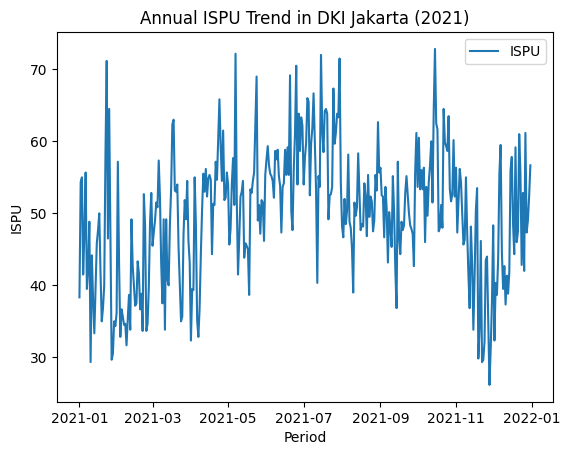

In [70]:
plt.plot(df1['tanggal'], df1['ISPU'], label='ISPU')
plt.xlabel('Period')
plt.ylabel('ISPU')
plt.title('Annual ISPU Trend in DKI Jakarta (2021)')
plt.legend()
plt.show()

In [71]:
max_ISPU = df1['ISPU'].max()
min_ISPU = df1['ISPU'].min()

tanggal_max_ISPU = df1.loc[df1['ISPU'] == max_ISPU, 'tanggal'].iloc[0]
tanggal_min_ISPU = df1.loc[df1['ISPU'] == min_ISPU, 'tanggal'].iloc[0]

print("Highest ISPU value:", max_ISPU, "on date", tanggal_max_ISPU)
print("Lowest ISPU value:", min_ISPU, "on date", tanggal_min_ISPU)

Highest ISPU value: 72.83333333333333 on date 2021-10-15 00:00:00
Lowest ISPU value: 26.166666666666668 on date 2021-11-28 00:00:00


**Merged Data**

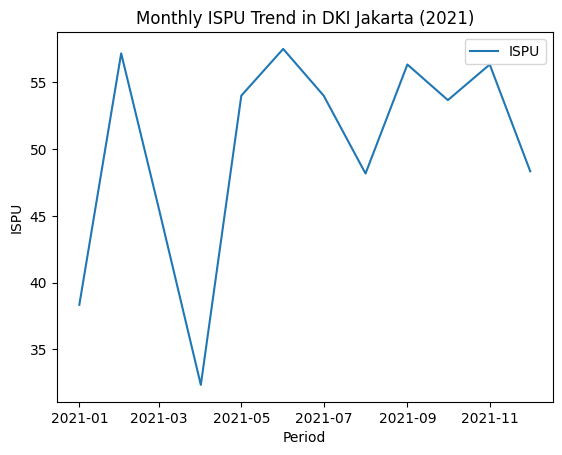

In [72]:
plt.plot(merged_df['tanggal'], merged_df['ISPU'], label='ISPU')
plt.xlabel('Period')
plt.ylabel('ISPU')
plt.title('Monthly ISPU Trend in DKI Jakarta (2021)')
plt.legend()
plt.show()

In [73]:
max_ISPU_merged = merged_df['ISPU'].max()
min_ISPU_merged = merged_df['ISPU'].min()

tanggal_max_ISPU_merged = merged_df.loc[merged_df['ISPU'] == max_ISPU_merged, 'tanggal'].iloc[0]
tanggal_min_ISPU_merged = merged_df.loc[merged_df['ISPU'] == min_ISPU_merged, 'tanggal'].iloc[0]

print("Highest ISPU value:", max_ISPU_merged, "on date", tanggal_max_ISPU_merged)
print("Lowest ISPU value:", min_ISPU_merged, "on date", tanggal_min_ISPU_merged)

Highest ISPU value: 57.5 on date 2021-06-01 00:00:00
Lowest ISPU value: 32.333333333333336 on date 2021-04-01 00:00:00


# **Four-Wheeled Vehicles Emission Test Analysis (2021)**

In [74]:
total_vehicles_per_month = merged_df.groupby(merged_df['tanggal'].dt.month)['jumlah_uji_emisi'].sum()

passed_per_month = merged_df.groupby(merged_df['tanggal'].dt.month)['jumlah_lulus'].sum()

pass_percentage_per_month = (passed_per_month / total_vehicles_per_month) * 100

print("Total number of four-wheeled vehicles taking emission tests each month:")
print(total_vehicles_per_month)

print("\nNumber of vehicles passing emission tests each month:")
print(passed_per_month)

print("\nPercentage of vehicles passing emission tests each month:")
print(pass_percentage_per_month)

Total number of four-wheeled vehicles taking emission tests each month:
tanggal
1      43692
2      31509
3      32967
4      25699
5      18041
6      18121
7       7283
8      10090
9      12346
10     18788
11    164028
12     56169
Name: jumlah_uji_emisi, dtype: int64

Number of vehicles passing emission tests each month:
tanggal
1      42915
2      31402
3      32893
4      25656
5      18022
6      18083
7       7274
8      10071
9      12285
10     18720
11    162910
12     56053
Name: jumlah_lulus, dtype: int64

Percentage of vehicles passing emission tests each month:
tanggal
1     98.221642
2     99.660414
3     99.775533
4     99.832678
5     99.894684
6     99.790299
7     99.876425
8     99.811695
9     99.505913
10    99.638067
11    99.318409
12    99.793480
dtype: float64


# **Worst Air Quality Period**

In [75]:
tanggal_max_ISPU = merged_df.loc[merged_df['ISPU'].idxmax(), 'tanggal']

gasoline_max_ISPU = merged_df[(merged_df['tanggal'] == tanggal_max_ISPU) &
                               (merged_df['bahan_bakar'] == 0)]['jumlah_lulus'].sum()

diesel_max_ISPU = merged_df[(merged_df['tanggal'] == tanggal_max_ISPU) &
                             (merged_df['bahan_bakar'] == 1)]['jumlah_lulus'].sum()

print("The worst air quality period occurred on:", tanggal_max_ISPU)
print("Number of gasoline vehicles that passed emission tests during this period:", gasoline_max_ISPU)
print("Number of diesel vehicles that passed emission tests during this period:", diesel_max_ISPU)

The worst air quality period occurred on: 2021-06-01 00:00:00
Number of gasoline vehicles that passed emission tests during this period: 15512
Number of diesel vehicles that passed emission tests during this period: 2571


# **Visualization of the Number of Vehicles Passing/Failing Emission Tests Each Month**

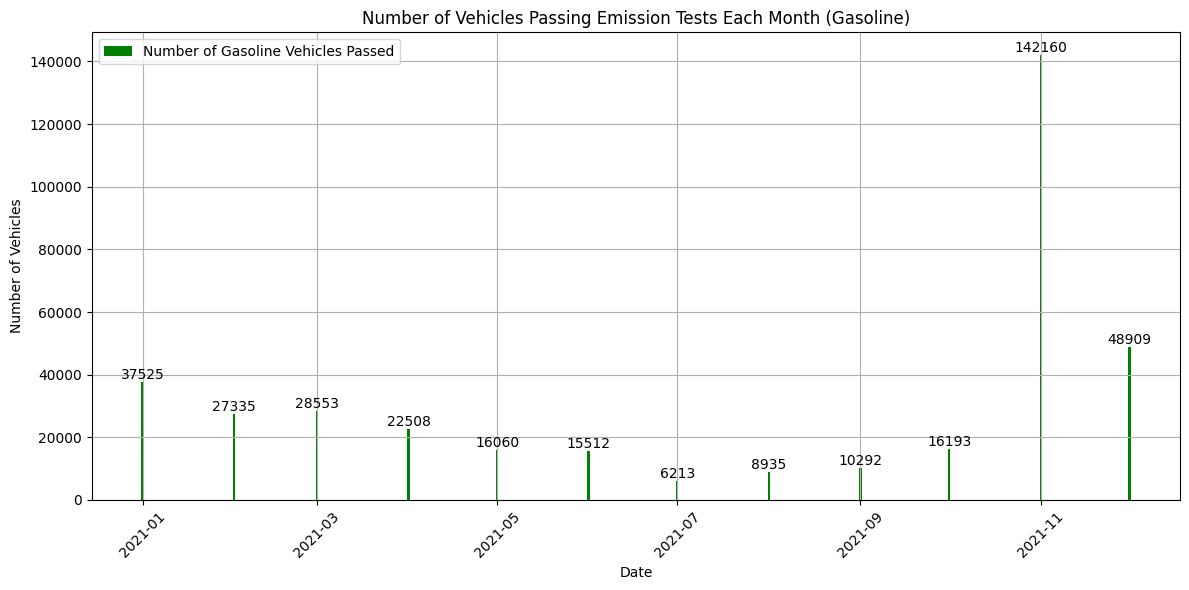

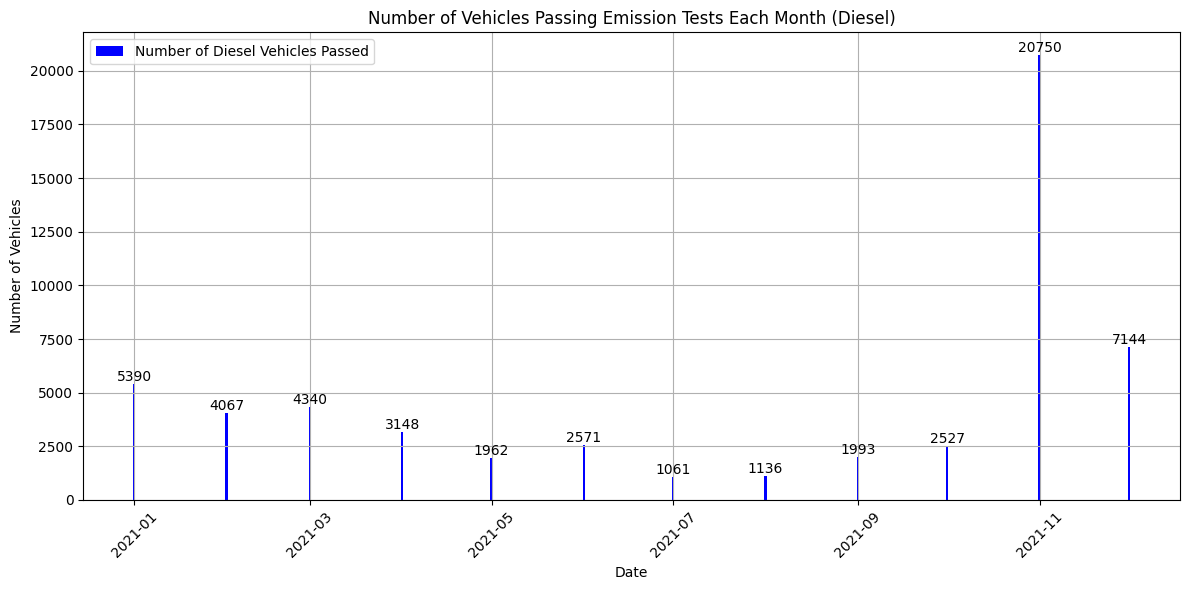

In [76]:
gasoline_df = merged_df[merged_df['bahan_bakar'] == 0]
diesel_df = merged_df[merged_df['bahan_bakar'] == 1]

plt.figure(figsize=(12, 6))
bars_gasoline = plt.bar(gasoline_df['tanggal'], gasoline_df['jumlah_lulus'],
                        color='g', label='Number of Gasoline Vehicles Passed')

for bar in bars_gasoline:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval),
             va='bottom', ha='center')

plt.title('Number of Vehicles Passing Emission Tests Each Month (Gasoline)')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
bars_diesel = plt.bar(diesel_df['tanggal'], diesel_df['jumlah_lulus'],
                      color='b', label='Number of Diesel Vehicles Passed')

for bar in bars_diesel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval),
             va='bottom', ha='center')

plt.title('Number of Vehicles Passing Emission Tests Each Month (Diesel)')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Visualization of the Number of Vehicles Failing Emission Tests Each Month**

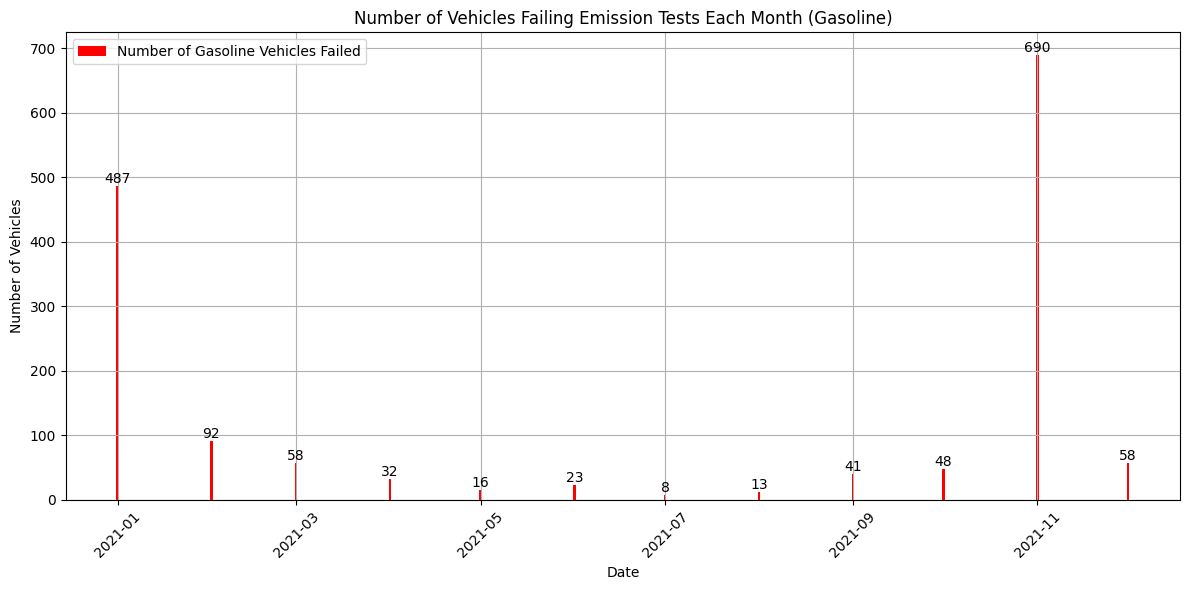

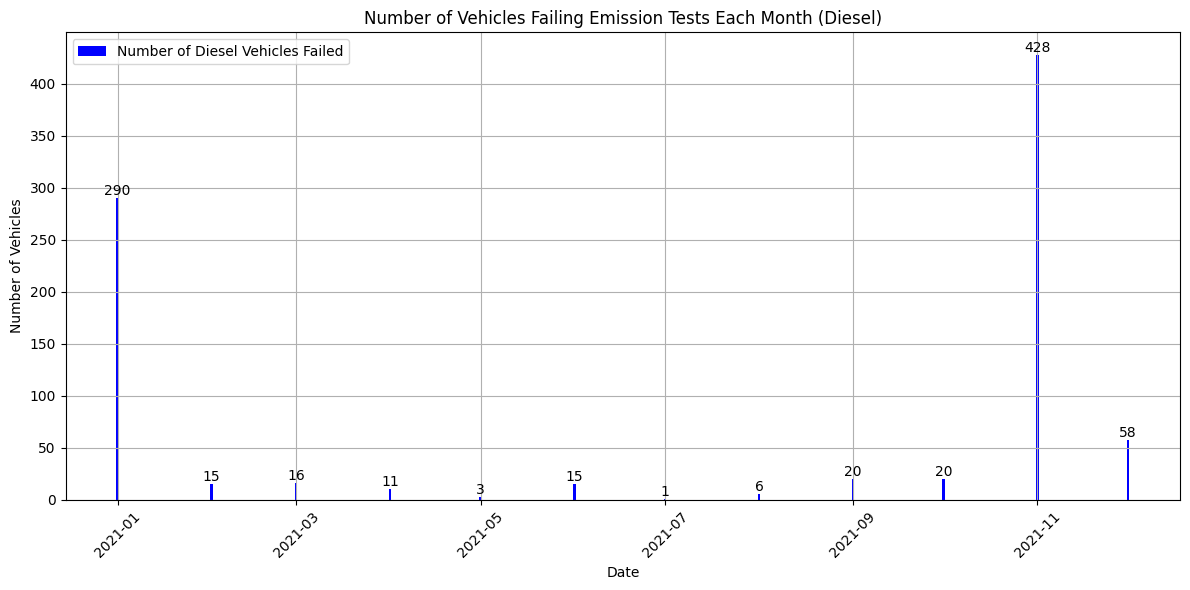

In [77]:
gasoline_df = merged_df[merged_df['bahan_bakar'] == 0]
diesel_df = merged_df[merged_df['bahan_bakar'] == 1]

plt.figure(figsize=(12, 6))
bars_gasoline = plt.bar(gasoline_df['tanggal'], gasoline_df['jumlah_tidak_lulus'],
                        color='r', label='Number of Gasoline Vehicles Failed')

for bar in bars_gasoline:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval),
             va='bottom', ha='center')

plt.title('Number of Vehicles Failing Emission Tests Each Month (Gasoline)')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
bars_diesel = plt.bar(diesel_df['tanggal'], diesel_df['jumlah_tidak_lulus'],
                      color='b', label='Number of Diesel Vehicles Failed')

for bar in bars_diesel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval),
             va='bottom', ha='center')

plt.title('Number of Vehicles Failing Emission Tests Each Month (Diesel)')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pearson Correlation Analysis**

In [78]:
correlation = merged_df['jumlah_lulus'].corr(merged_df['ISPU'])
print("Correlation between Number of Vehicles Passing Emission Tests and ISPU:", correlation)

Correlation between Number of Vehicles Passing Emission Tests and ISPU: 0.06922333998424345


# **Heatmap Correlation**

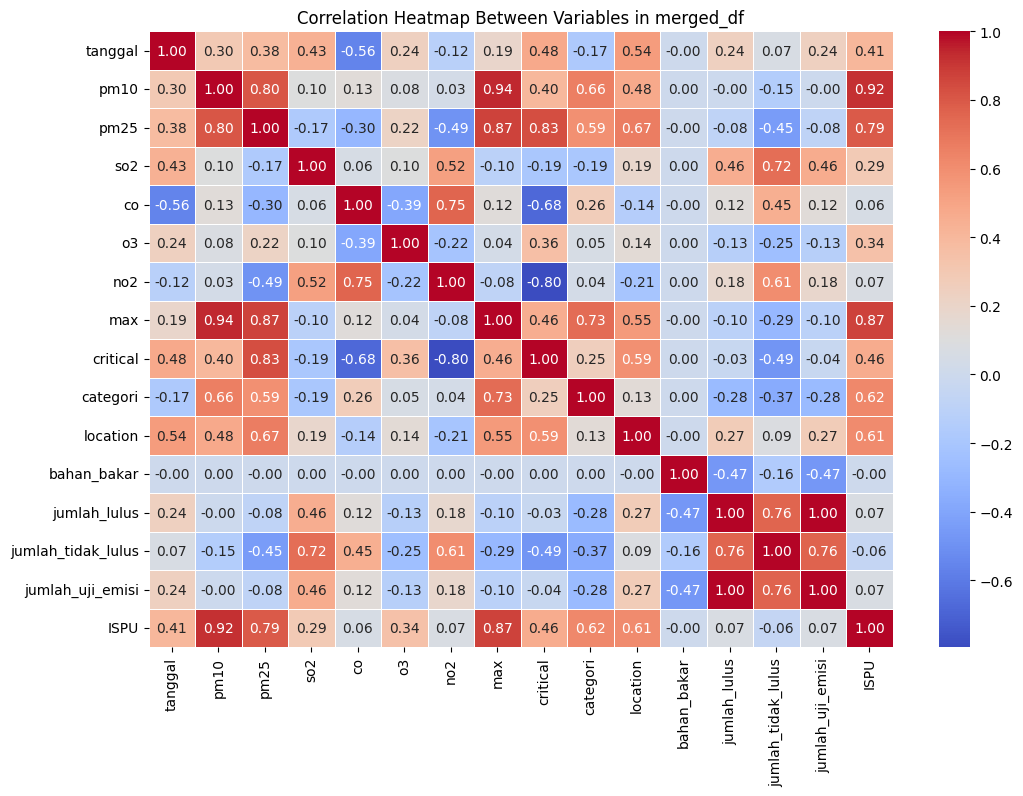

In [79]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Variables in merged_df')
plt.show()

# **Linear Regression Modeling**

In [80]:
# Define independent and dependent variables
X = merged_df[['jumlah_lulus']]
y = merged_df['ISPU']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize linear regression model
regression_model = LinearRegression()

# Train the model
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 182.1403575946087


**Question 1**

How was the trend of the Air Pollution Standard Index (ISPU) in DKI Jakarta throughout 2021?

It was highly fluctuating with an up-and-down pattern.
The highest value was 57.5 in June, and the lowest value was 32.33 in April.

**Question 2**

Is there a correlation between the number of vehicles passing emission tests and the ISPU value?

The correlation result shows that the relationship between the two variables is weak (0.069).

**Question 3**

During which period was the air quality the worst, and how many vehicles passed the emission test during that period?

The worst air quality occurred on: 2021-06-01

Number of gasoline vehicles that passed: 15,512

Number of diesel vehicles that passed: 2,571